In [ ]:
#imports 
import sqlite3
import pandas as pd

In [ ]:
#get from Git
%cd /content/
%rm -r ./2022TeamBDataEngineeringBC
!git clone https://github.com/Fuenfgeld/2022TeamBDataEngineeringBC.git
%cd ./2022TeamBDataEngineeringBC/

In [ ]:
#connect to DB
conn = sqlite3.connect('sqlite_example.db')
cursor = conn.cursor()
print("Opened database successfully");

In [ ]:
#Delete Tables in case they exist
cursor.execute("DROP TABLE IF EXISTS food")
cursor.execute("DROP TABLE IF EXISTS orders")
cursor.execute("DROP TABLE IF EXISTS animals")
cursor.execute("DROP TABLE IF EXISTS customer")
cursor.execute("DROP TABLE IF EXISTS customer_buys_food")
cursor.execute("DROP TABLE IF EXISTS employee")
cursor.execute("DROP TABLE IF EXISTS sales")
cursor.execute("DROP TABLE IF EXISTS food_new")
cursor.execute("DROP TABLE IF EXISTS customer_new")
cursor.execute("DROP TABLE IF EXISTS employee_new")

In [ ]:
#load CSVs
food = pd.read_csv('../tables/initial_tables/Futter.csv', sep=";")
customer = pd.read_csv('../tables/initial_tables/Kunden.csv', sep=";")
animals = pd.read_csv('../tables/initial_tables/Tiere.csv', sep=";")
orders = pd.read_csv('../tables/initial_tables/Order.csv', sep=";")
employee = pd.read_csv('../tables/initial_tables/Verkaeufer.csv', sep=";")
customer_buys_food = pd.read_csv('../tables/initial_tables/Customer_buys_Food.csv', sep=";")

In [ ]:
#Create Tables
cursor.execute('''
		CREATE TABLE IF NOT EXISTS customer (
			customer_ID int primary key,
            name nvarchar(50),
			postal_code nvarchar(5),
			city nvarchar(50)
			)
               ''')

cursor.execute('''
		CREATE TABLE IF NOT EXISTS employee (
			employee_ID int primary key,
            name nvarchar(50),
            gender nvarchar(1),
			wage int
			)
               ''')

cursor.execute('''
		CREATE TABLE IF NOT EXISTS food (
			food_ID int primary key,
            name nvarchar(50),
			price_per_kg float,
            producer nvarchar(50),
            origin nvarchar(50)
			)
               ''')

cursor.execute('''
		CREATE TABLE IF NOT EXISTS animals (
            name nvarchar(50) primary key,
			food int NOT NULL UNIQUE,
			foreign key(food) references food(food_ID)
			)
               ''') 
cursor.execute('''
		CREATE TABLE IF NOT EXISTS orders (
            order_Nr int primary key,
            date Date,
            transact int
			)
               ''')


cursor.execute('''
		CREATE TABLE IF NOT EXISTS customer_buys_food (
            C_ID int ,
            F_ID int,
			amount int,
            O_ID int,
            E_ID int,
            foreign key(C_ID) references customer(customer_ID)
			foreign key(F_ID) references food(food_ID)
            foreign key(O_ID) references orders(order_Nr)
            foreign key(E_ID) references employee(employee_ID)
			)
               ''') 

In [ ]:
#Insert into table
customer.to_sql('customer', conn, if_exists='append', index=False)
animals.to_sql('animals', conn, if_exists='append', index=False)
food.to_sql('food', conn, if_exists='append', index=False)
orders.to_sql('orders', conn, if_exists='append', index=False)
employee.to_sql('employee', conn, if_exists='append', index=False)
customer_buys_food.to_sql('customer_buys_food', conn, if_exists='append', index=False)

<h1> Herzlich Willkomen zur Präsentation des SQLite Teams! </h1>

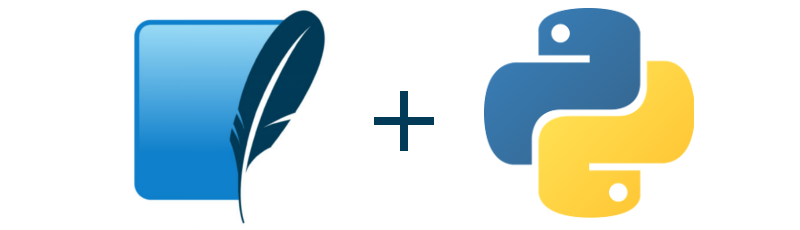

<h1>Inhalt</h1>

1. Teil 1
  1. Einführung
  2. ER - Diagramme
  3. Meta-Informationen (PRGAMA)
2. Teil 2
  1. SQLite Subqueries
  2. OLAP vs. OLTP
3. Teil 3
  1. Sternschema
  2. Transformation in das Sternschema
  3. Joinabfrage
  4. Abschluss


<h1> Einführung </h1>

Wir sind eine Firma, welche Daten für Unternehmen auswertet. Eine Tierhandlung hat uns Zugriff auf ihre Datenbank gegeben, um Analysen über die Verkäufe durchzuführen. Leider hat die IT-Abteilung vergessen uns mitzuteilen wie die Datenbank aufgebaut ist.


<h1> Was ist ein ER-Diagramm? </h1>

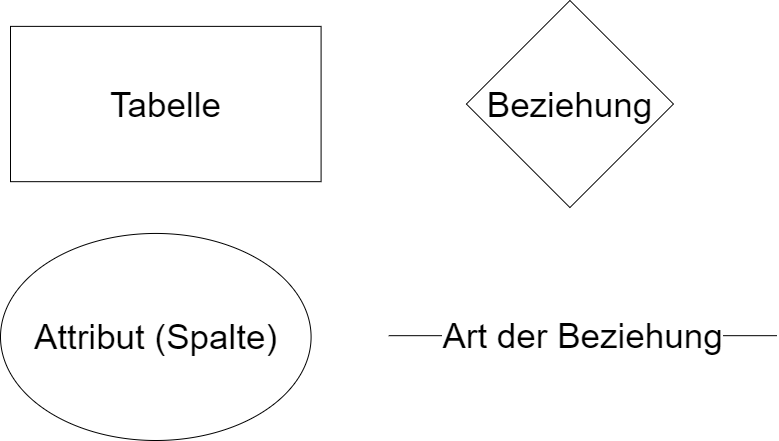

<h1> Mithilfe der Meta-Informationen die Struktur herausfinden </h1>

### Alle Tabellennamen in der Datenbank auslesen

In [ ]:
print(pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn))

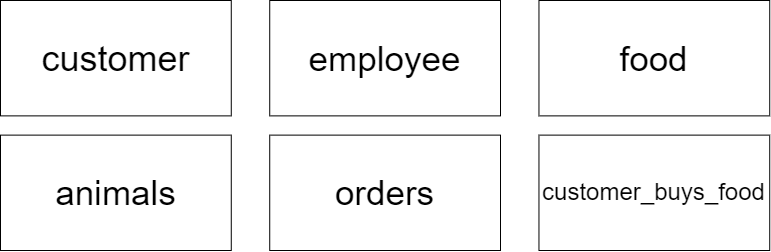

### Private Keys und Tabellenspalten auslesen

In [ ]:
print(pd.read_sql_query("PRAGMA table_info('orders')", conn))
print("--------------------------------------------------------")
print(pd.read_sql_query("PRAGMA table_info('food')", conn))
print("--------------------------------------------------------")
print(pd.read_sql_query("PRAGMA table_info('animals')", conn))

In [ ]:
print(pd.read_sql_query("PRAGMA table_info('customer')", conn))
print("--------------------------------------------------------")
print(pd.read_sql_query("PRAGMA table_info('customer_buys_food')", conn))
print("--------------------------------------------------------")
print(pd.read_sql_query("PRAGMA table_info('employee')", conn))

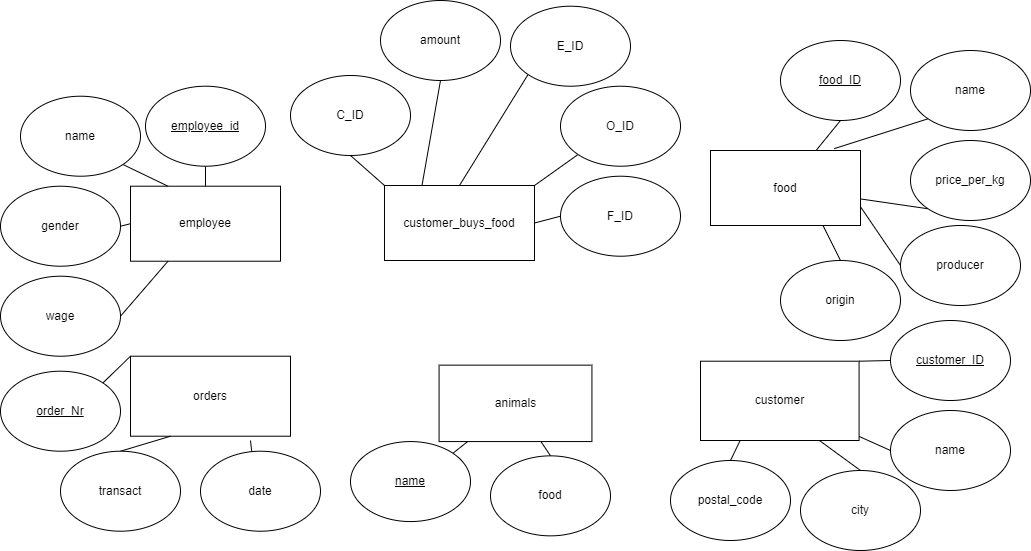

### Foreign Keys auslesen

In [ ]:
print(pd.read_sql_query("PRAGMA foreign_key_list('orders')", conn))
print("---------------------------------------------------")
print(pd.read_sql_query("PRAGMA foreign_key_list('food')", conn))
print("---------------------------------------------------")
print(pd.read_sql_query("PRAGMA foreign_key_list('Animals')", conn))
print("---------------------------------------------------")
print(pd.read_sql_query("PRAGMA foreign_key_list('customer')", conn))
print("---------------------------------------------------")
print(pd.read_sql_query("PRAGMA foreign_key_list('customer_buys_food')", conn))
print("---------------------------------------------------")
print(pd.read_sql_query("PRAGMA foreign_key_list('employee')", conn))

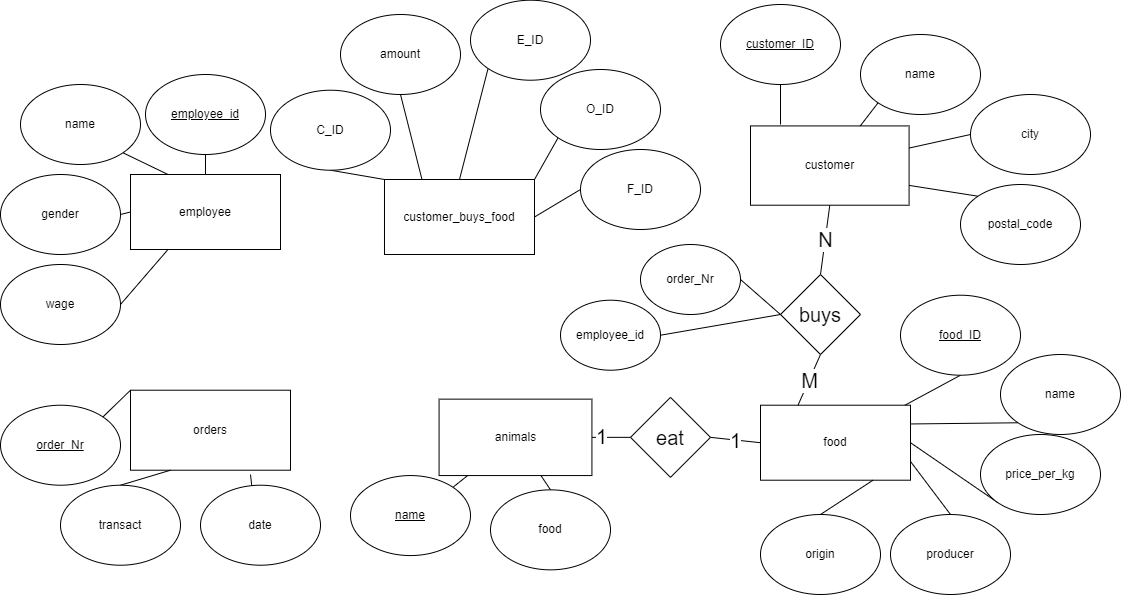

<h1>Übung</h1>

# Zusammenfassung
1. print(pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn))
2. print(pd.read_sql_query("PRAGMA table_info('TABELLENNAME')", conn))
3. print(pd.read_sql_query("PRAGMA foreign_key_list("TABELLENNAME")", conn))

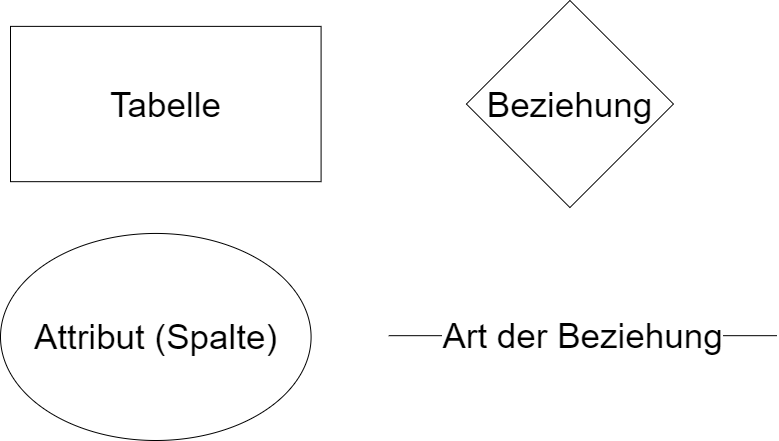

<h1> Teil 2 </h1>

<h2> Subselect </h2>

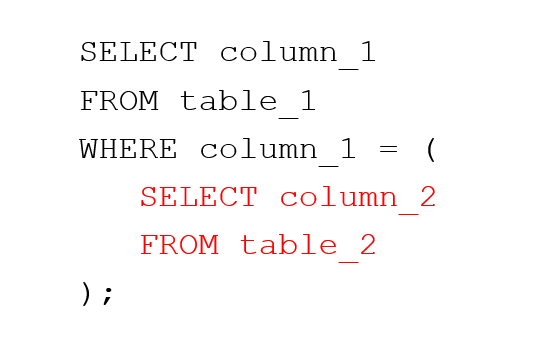

#### Kunden-ID, der Kunden, die Hundefutter gekauft haben.

In [ ]:
print(pd.read_sql_query('''
    SELECT C_ID
    FROM customer_buys_food
    WHERE F_ID = (
        SELECT food_ID 
        FROM food
        WHERE name = 'Hundefutter'
        )''', conn))

#### Kunden-ID der Kunden, die Futter gekauft haben, das in Deutschland hergestellt wurde.

In [ ]:
print(pd.read_sql_query('''
    SELECT C_ID 
    FROM customer_buys_food
    WHERE F_ID =
       (SELECT food_ID FROM food WHERE origin == 'Deutschland')
    ''', conn))

In [ ]:
print(pd.read_sql_query('''
    SELECT C_ID 
    FROM customer_buys_food
    WHERE F_ID IN
       (SELECT food_ID FROM food WHERE origin == 'Deutschland')
    ''', conn))

#### Name und Verkäufer-ID der Verkäufer, die nichts verkauft haben.

In [ ]:
print(pd.read_sql_query('''
    SELECT employee_ID, name
    FROM employee
    WHERE NOT EXISTS (
        SELECT *
        FROM customer_buys_food
        WHERE E_ID = employee.employee_ID
        )
    ORDER BY name;
    ''', conn))

<h2> OLTP vs. OLAP </h2>

<h3>Einsatz</h3>

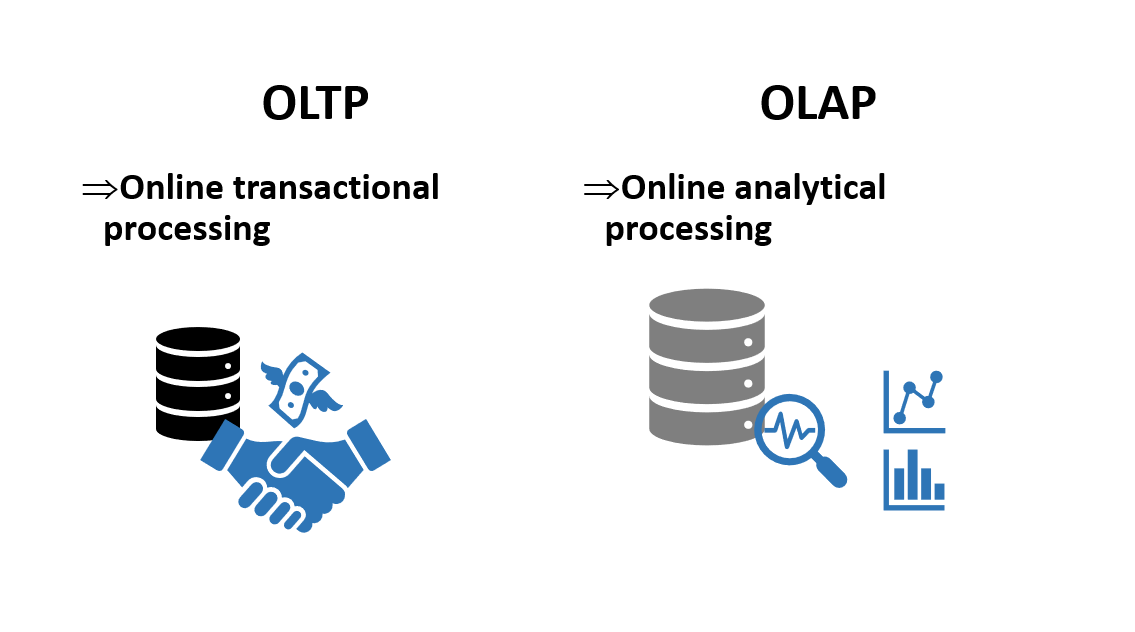

<h3>Anforderungen</h3>

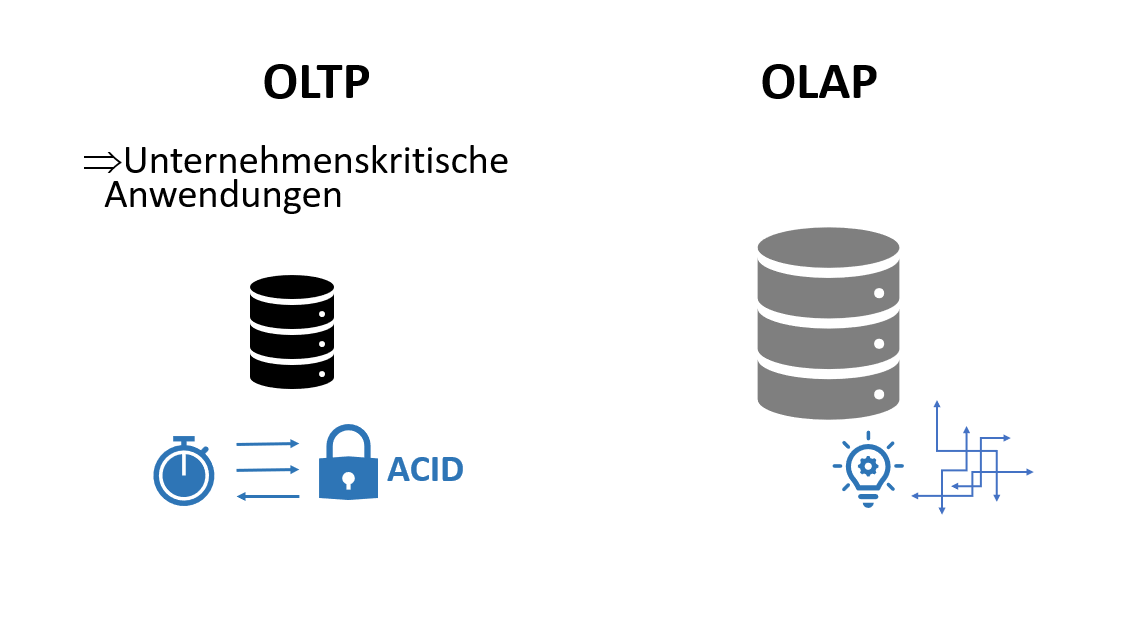

<h3>Datenstruktur</h3>

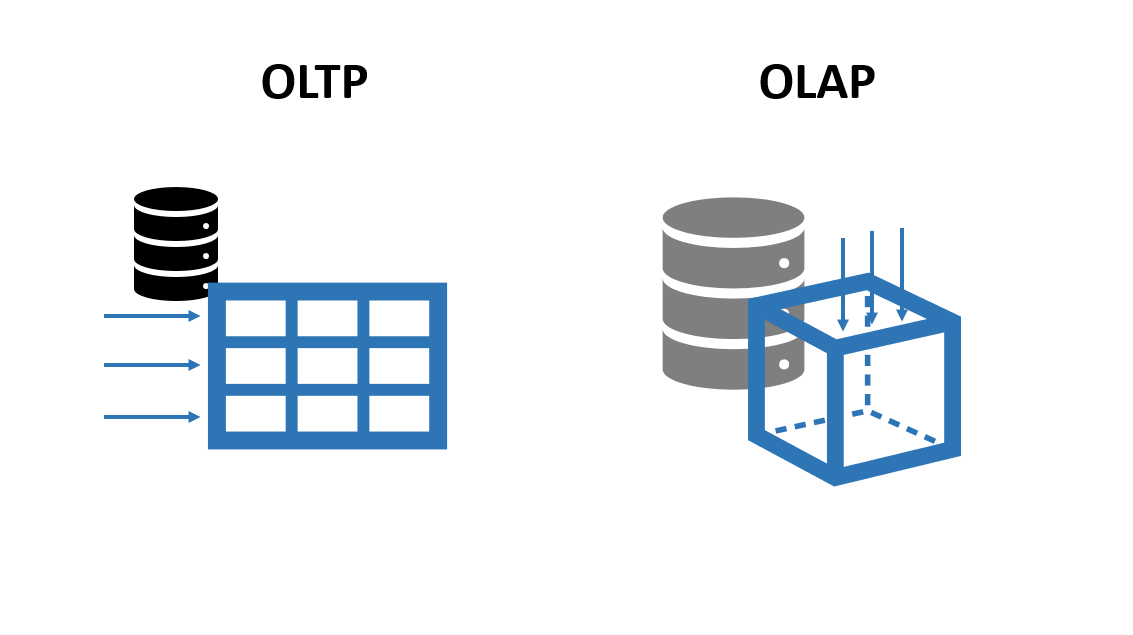

<h1> Teil 3 </h1>

<h3>Sternschema</h3>

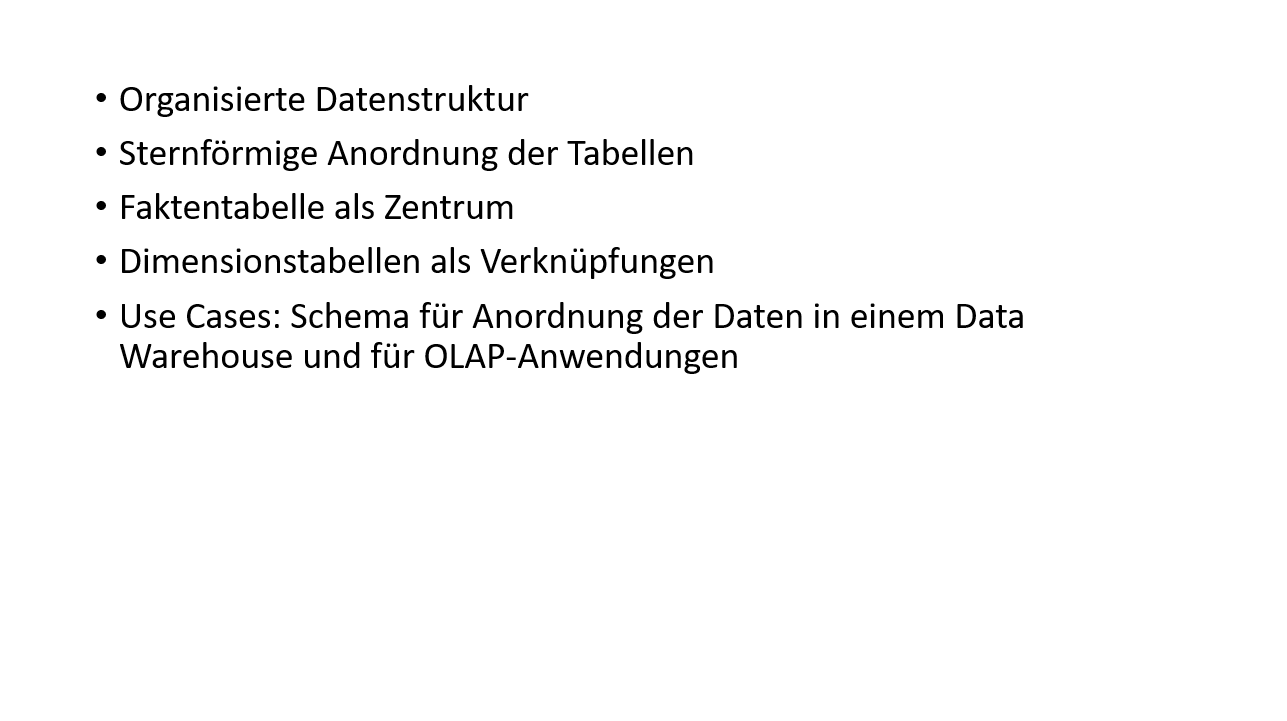

<h3>Faktentabelle</h3>

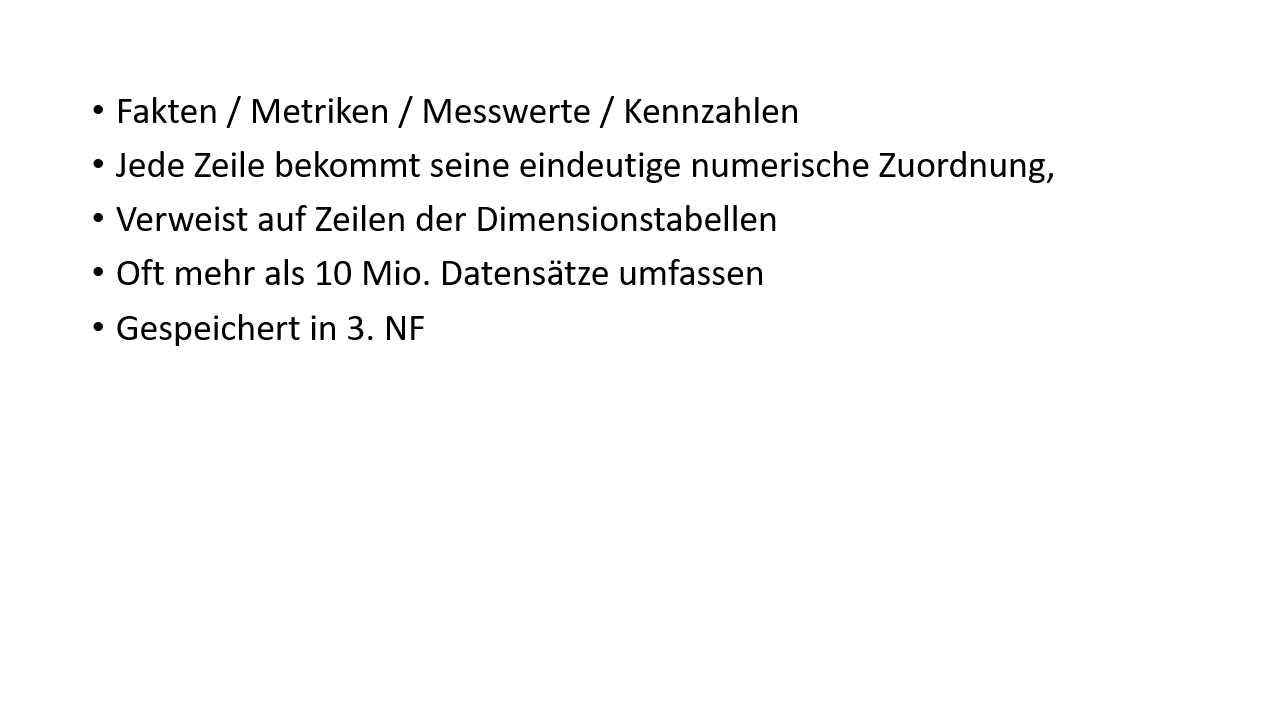

<h3>Dimensionstabellen</h3>

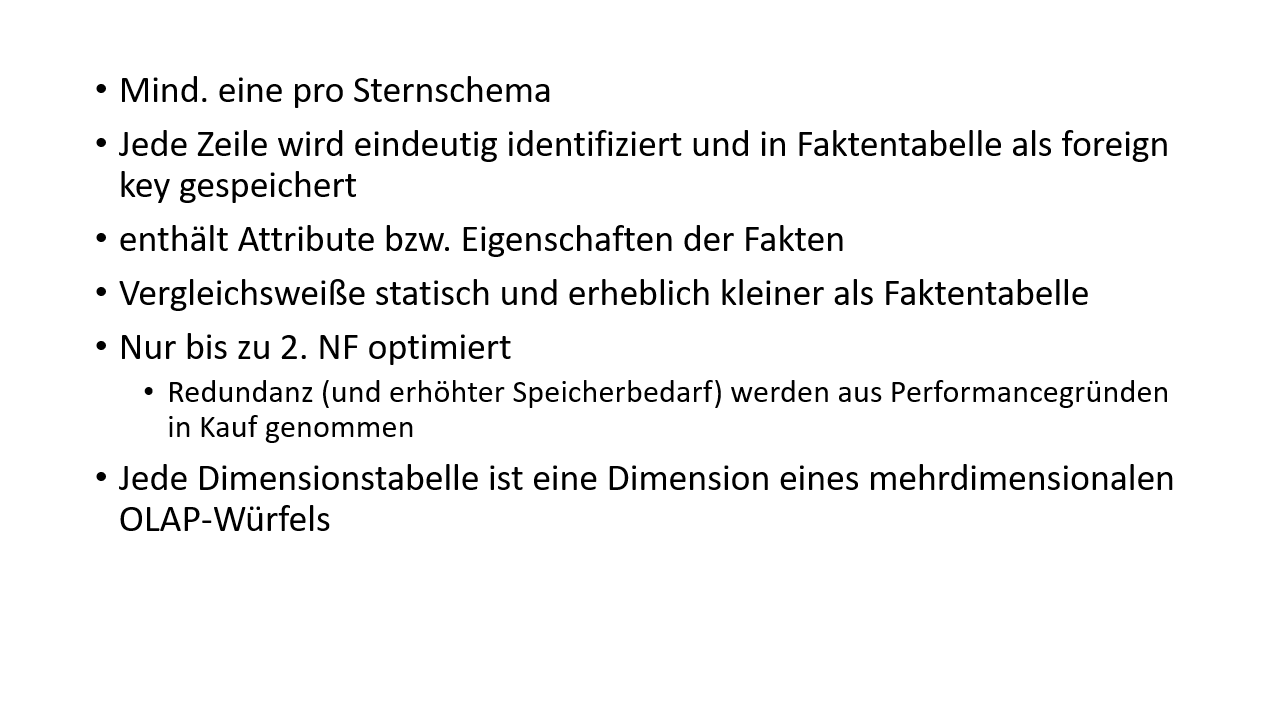

<img src=https://raw.githubusercontent.com/Fuenfgeld/2022TeamBDataEngineeringBC/main/Presentation/Bilder/Starnschema_Aufbau.png width="750">

## Erstellen des Sternschemas

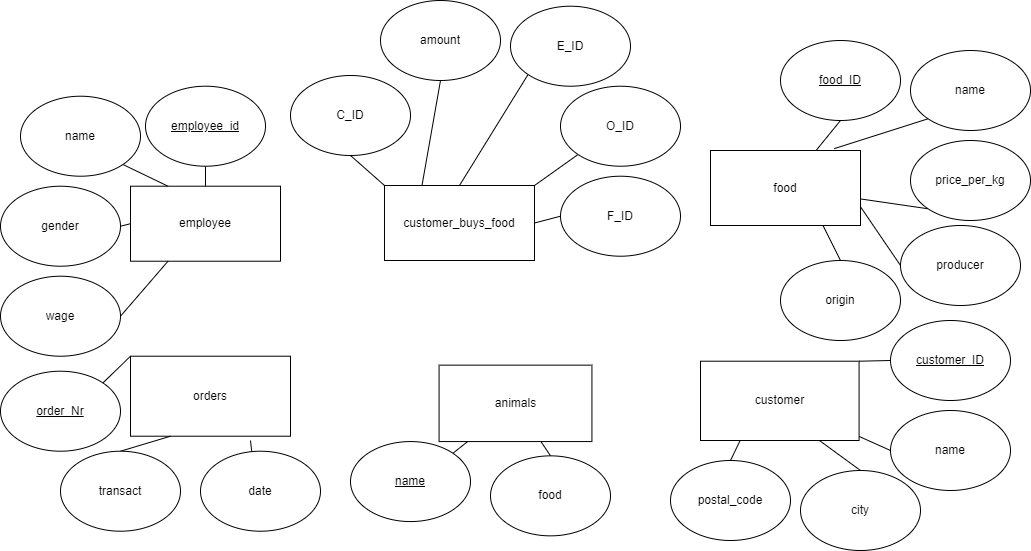

<h2> Joins </h2>

## INNER JOIN (Simple Join)

Der SQLite INNER JOIN gibt die Daten zurück, bei denen sich Tabelle 1 und Tabelle 2 überschneiden.

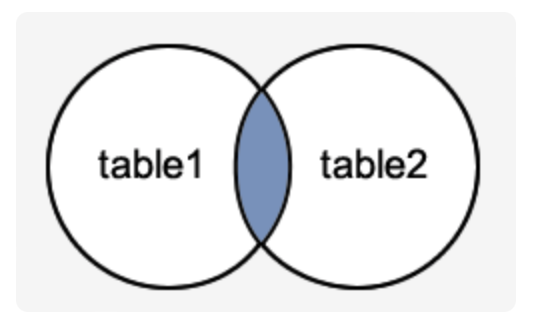

## LEFT OUTER JOIN

LEFT OUTER JOIN gibt alle Zeilen aus der Tabelle 1 und nur die Zeilen aus der anderen Tabelle 2 zurück, bei denen die verknüpften Felder gleich sind.

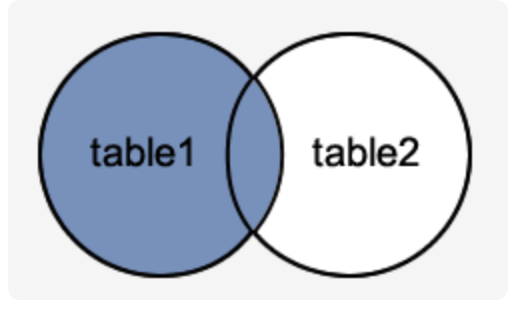

In [ ]:
cursor.execute('''PRAGMA foreign_keys = OFF;''')  # disable foreign keys
conn.commit()


cursor.execute('''CREATE TABLE IF NOT EXISTS food_new(
                  food_id INT PRIMARY KEY,
                  name TEXT,
                  price_per_kg FLOAT,
                  producer TEXT,
                  origin TEXT,
                  animal TEXT
                  );''')

cursor.execute('''CREATE TABLE IF NOT EXISTS customer_new(
                  cust_id INT PRIMARY KEY NOT NULL UNIQUE,
                  name TEXT,
                  postal_code nvarchar(5),
                  city TEXT
                  );''')

cursor.execute('''CREATE TABLE IF NOT EXISTS employee_new(
                  empl_id INT PRIMARY KEY NOT NULL UNIQUE,
                  name TEXT,
                  gender nvarchar(1),
                  wage INT
                  );''')

conn.commit()


cursor.execute('''INSERT INTO food_new(food_id, name, price_per_kg, producer, origin, animal)
                  SELECT food.food_ID, food.name, food.price_per_kg, food.producer, food.origin, animals.name
                  FROM food
                  INNER JOIN animals ON food.food_ID = animals.food;
                  ''')
conn.commit()
cursor.execute(''' SELECT * FROM food_new;''')
cursor.execute(''' PRAGMA table_info(food_new);''')
records = cursor.fetchall()

cursor.execute('''INSERT INTO employee_new(empl_id, name, gender, wage)
                  SELECT employee_ID, name, gender, wage
                  FROM employee;
                  ''')

conn.commit()
cursor.execute(''' SELECT * FROM employee_new;''')
records = cursor.fetchall()

    
    
cursor.execute(''' SELECT * FROM customer_new;''')
cursor.execute(''' PRAGMA table_info(customer_new);''')
records = cursor.fetchall()

    
cursor.execute('''INSERT INTO customer_new(cust_id, name, postal_code, city)
                  SELECT customer_ID, name, postal_code, city
                  FROM customer;
                  ''')

conn.commit()
cursor.execute(''' SELECT * FROM customer_new;''')
records = cursor.fetchall()

## Faktentabelle

In [ ]:
cursor.execute('''CREATE TABLE IF NOT EXISTS sales(
                  order_nr  INT PRIMARY KEY NOT NULL UNIQUE,
                  transact,
                  date DATE,
                  customer_id int, 
                  food_id INT,
                  amount INT,
                  employee_id INT,
                  foreign key(food_id) references food_new(food_id),
                  foreign key(customer_id) references customer_new(cust_id),
                  foreign key(employee_id) references employee_new(empl_id)
                  );''')

In [ ]:
cursor.execute('''INSERT INTO sales( order_nr, transact, date, customer_id, food_id, amount,employee_id )
    SELECT order_Nr,transact, date, C_ID, food_ID, amount, E_ID 
    FROM orders
    LEFT JOIN 
        customer_buys_food ON orders.order_Nr = customer_buys_food.O_ID
    LEFt JOIN 
        food ON customer_buys_food.F_ID = food.food_ID;
    ''')

In [ ]:
cursor.execute(''' PRAGMA table_info(sales);''')
records = cursor.fetchall()

<img src=https://raw.githubusercontent.com/Fuenfgeld/2022TeamBDataEngineeringBC/main/Presentation/Bilder/Sternschema_DB.png width="1000">

## Inhalt der neuen Tabellen

## Inhalt der Faktentabelle

In [ ]:
print(pd.read_sql_query("SELECT * FROM sales", conn))

## Inhalt der Dimensionstabelle 

In [ ]:
print(pd.read_sql_query("SELECT * FROM employee_new", conn))

In [ ]:
print(pd.read_sql_query("SELECT * FROM food_new", conn))

## Wie viel Geld hat jeder Kunder ausgegeben?

In [ ]:
print(pd.read_sql_query('''
    SELECT customer_id, food_new.price_per_kg*amount as sum FROM sales
   INNER JOIN 
    food_new ON sales.food_id = food_new.food_id 
    GROUP BY customer_id
    ORDER by sum DESC
    ''', conn))

### Welcher Verkäufer hat am meisten Umsatz erwirtschaftet?

In [ ]:
print(pd.read_sql_query('''
    SELECT 
    employee_new.name as employee, sales.amount, food_new.price_per_kg,
    SUM(food_new.price_per_kg*sales.amount) as sum_sales
    FROM employee_new
    LEFT JOIN 
        sales ON employee_new.empl_id = sales.employee_id
    INNER JOIN 
        food_new ON sales.food_id = food_new.food_id
    GROUP BY employee_new.name
    ORDER BY sum_sales DESC
    ''', conn))